In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import numpy as np
from google.colab import drive
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from datetime import datetime
from google.colab import drive

In [48]:
# Load your data
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/HealthOps 360 - Drive/HealthOps 360 - Data set.xlsx'
df = pd.read_excel(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
   PatientID          State                                 Hospital  \
0          1  Massachusetts             Brigham and Women's Hospital   
1          2     Washington  University of Washington Medical Center   
2          3        Indiana                           Union Hospital   
3          4        Indiana         Parkview Regional Medical Center   
4          5        Vermont                          Copley Hospital   

  Date of Admission     Sex Admission Type GeneralHealth      AgeCategory  \
0        2024-01-31    Male       Elective     Excellent     Age 30 to 34   
1        2019-08-20  Female       Elective          Good  Age 80 or older   
2        2022-09-22  Female       Elective     Very good     Age 55 to 59   
3        2020-11-18    Male       Elective     Very good     Age 40 to 44   
4        2022-09-19  Female      Emergency          Poor     Age 45 to 49   

   Age  HeightInMeters  ...  FluVaxLast12  PneumoVaxEver  \
0   33       

In [50]:
initial_rows = df.shape[0]
print(f"Initial number of rows: {initial_rows}")

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicate rows removed. New number of rows: {df.shape[0]}")
else:
    print("No duplicate rows found.")

print("\nDataFrame Info after checking for duplicates:")
df.info()

Initial number of rows: 55500
Number of duplicate rows: 0
No duplicate rows found.

DataFrame Info after checking for duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PatientID                  55500 non-null  int64         
 1   State                      55500 non-null  object        
 2   Hospital                   55500 non-null  object        
 3   Date of Admission          55500 non-null  datetime64[ns]
 4   Sex                        55500 non-null  object        
 5   Admission Type             55500 non-null  object        
 6   GeneralHealth              55500 non-null  object        
 7   AgeCategory                55500 non-null  object        
 8   Age                        55500 non-null  int64         
 9   HeightInMeters             55500 non-null  float64       
 10  

In [51]:
print("\nMissing values before cleaning:\n")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Clean column names by stripping whitespace, particularly 'Cost per Patient Day'
df.columns = df.columns.str.strip()

print("\nDataFrame Info after checking for missing values and stripping column name whitespace:")
df.info()


Missing values before cleaning:

Series([], dtype: int64)

DataFrame Info after checking for missing values and stripping column name whitespace:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PatientID                  55500 non-null  int64         
 1   State                      55500 non-null  object        
 2   Hospital                   55500 non-null  object        
 3   Date of Admission          55500 non-null  datetime64[ns]
 4   Sex                        55500 non-null  object        
 5   Admission Type             55500 non-null  object        
 6   GeneralHealth              55500 non-null  object        
 7   AgeCategory                55500 non-null  object        
 8   Age                        55500 non-null  int64         
 9   HeightInMeters             55500 non-null  flo

In [52]:
print("\nInspecting object type columns for unique values:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn '{col}':")
    print(df[col].value_counts(dropna=False))
    print(f"Number of unique values: {df[col].nunique()}")


Inspecting object type columns for unique values:

Column 'State':
State
Washington              3366
Maryland                2118
Minnesota               2046
Ohio                    2031
New York                1984
Texas                   1724
Florida                 1649
Wisconsin               1365
Kansas                  1365
Maine                   1347
Indiana                 1283
Hawaii                  1270
Virginia                1251
Iowa                    1246
Arizona                 1223
Massachusetts           1208
South Carolina          1202
Utah                    1195
Michigan                1180
Connecticut             1177
Colorado                1175
Nebraska                1157
Georgia                 1141
California              1088
Vermont                 1029
Montana                  977
South Dakota             966
Missouri                 941
New Jersey               900
Puerto Rico              845
New Hampshire            836
Idaho                    76

In [53]:
for col in ['State', 'Sex', 'Admission Type', 'GeneralHealth', 'AgeCategory', 'BMI_Category', 'Blood Type', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'TetanusLast10Tdap']:
    df[col] = df[col].astype('category')

print("\nDataFrame Info after converting object columns to category:")
df.info()


DataFrame Info after converting object columns to category:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   PatientID                  55500 non-null  int64         
 1   State                      55500 non-null  category      
 2   Hospital                   55500 non-null  object        
 3   Date of Admission          55500 non-null  datetime64[ns]
 4   Sex                        55500 non-null  category      
 5   Admission Type             55500 non-null  category      
 6   GeneralHealth              55500 non-null  category      
 7   AgeCategory                55500 non-null  category      
 8   Age                        55500 non-null  int64         
 9   HeightInMeters             55500 non-null  float64       
 10  WeightInKilograms          55500 non-null  float64       
 11  BMI   

In [54]:
# =====================================================
# 2. DATA CLEANING & ROBUST PREPROCESSING
# =====================================================

df.columns = df.columns.str.strip()

if 'Cost per Patient Day' not in df.columns:
    print("Column 'Cost per Patient Day' not found. Calculating it automatically...")
    if 'Billing Amount' in df.columns and 'Length of Stay' in df.columns:
        df['Cost per Patient Day'] = df['Billing Amount'] / df['Length of Stay'].replace(0, 1)
    else:
        df['Cost per Patient Day'] = 0
        print("Warning: Could not calculate Revenue. Setting to 0.")

if 'Date of Admission' in df.columns:
    df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
    df['Year'] = df['Date of Admission'].dt.year
else:
    df['Year'] = 2024

def clean_risk(x):
    val = str(x).lower().strip()
    if val in ['yes', '1', 'true']:
        return 'High Risk'
    return 'Standard Risk'

if 'HighRiskLastYear' in df.columns:
    df['Risk_Label'] = df['HighRiskLastYear'].apply(clean_risk)
else:
    df['Risk_Label'] = 'Standard Risk'

def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('$', '').replace(',', ''))
    return x

for col in ['Cost per Patient Day', 'Billing Amount']:
    if col in df.columns:
        df[col] = df[col].apply(clean_currency)

if 'Admission Type' not in df.columns:
    df['Admission Type'] = 'Unknown'

Column 'Cost per Patient Day' not found. Calculating it automatically...


In [55]:
if not df.empty:
    df.columns = [c.replace('\xa0', ' ').strip() for c in df.columns]

    if 'Billing Amount' in df.columns:
        df['Billing Amount'] = pd.to_numeric(df['Billing Amount'].astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')

    if 'Date of Admission' in df.columns:
        df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')

        df_clean = df.dropna(subset=['Date of Admission']).copy()

        if not df_clean.empty:
            df_clean['MonthYear'] = df_clean['Date of Admission'].dt.to_period('M')
            print(f"Dates processed. Rows with valid dates: {len(df_clean)}")
        else:
            print("Warning: All dates are invalid (NaT). Charts 3 & 4 will be empty.")
            df_clean['MonthYear'] = None
    else:
        print("Warning: 'Date of Admission' column not found.")
        df_clean = df.copy()

Dates processed. Rows with valid dates: 55500


/tmp/ipython-input-4284015940.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-4284015940.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_los = df.groupby('AgeCategory')['Length of Stay'].mean().sort_values()
/tmp/ipython-input-4284015940.py:146: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_hosp = df.groupby('State')['Hospital'].nunique().sort_values(ascending=False).head(20)
/tmp/ipython-input-4284015940.py:147: Future

Dashboard Generated Successfully (with auto-corrections).


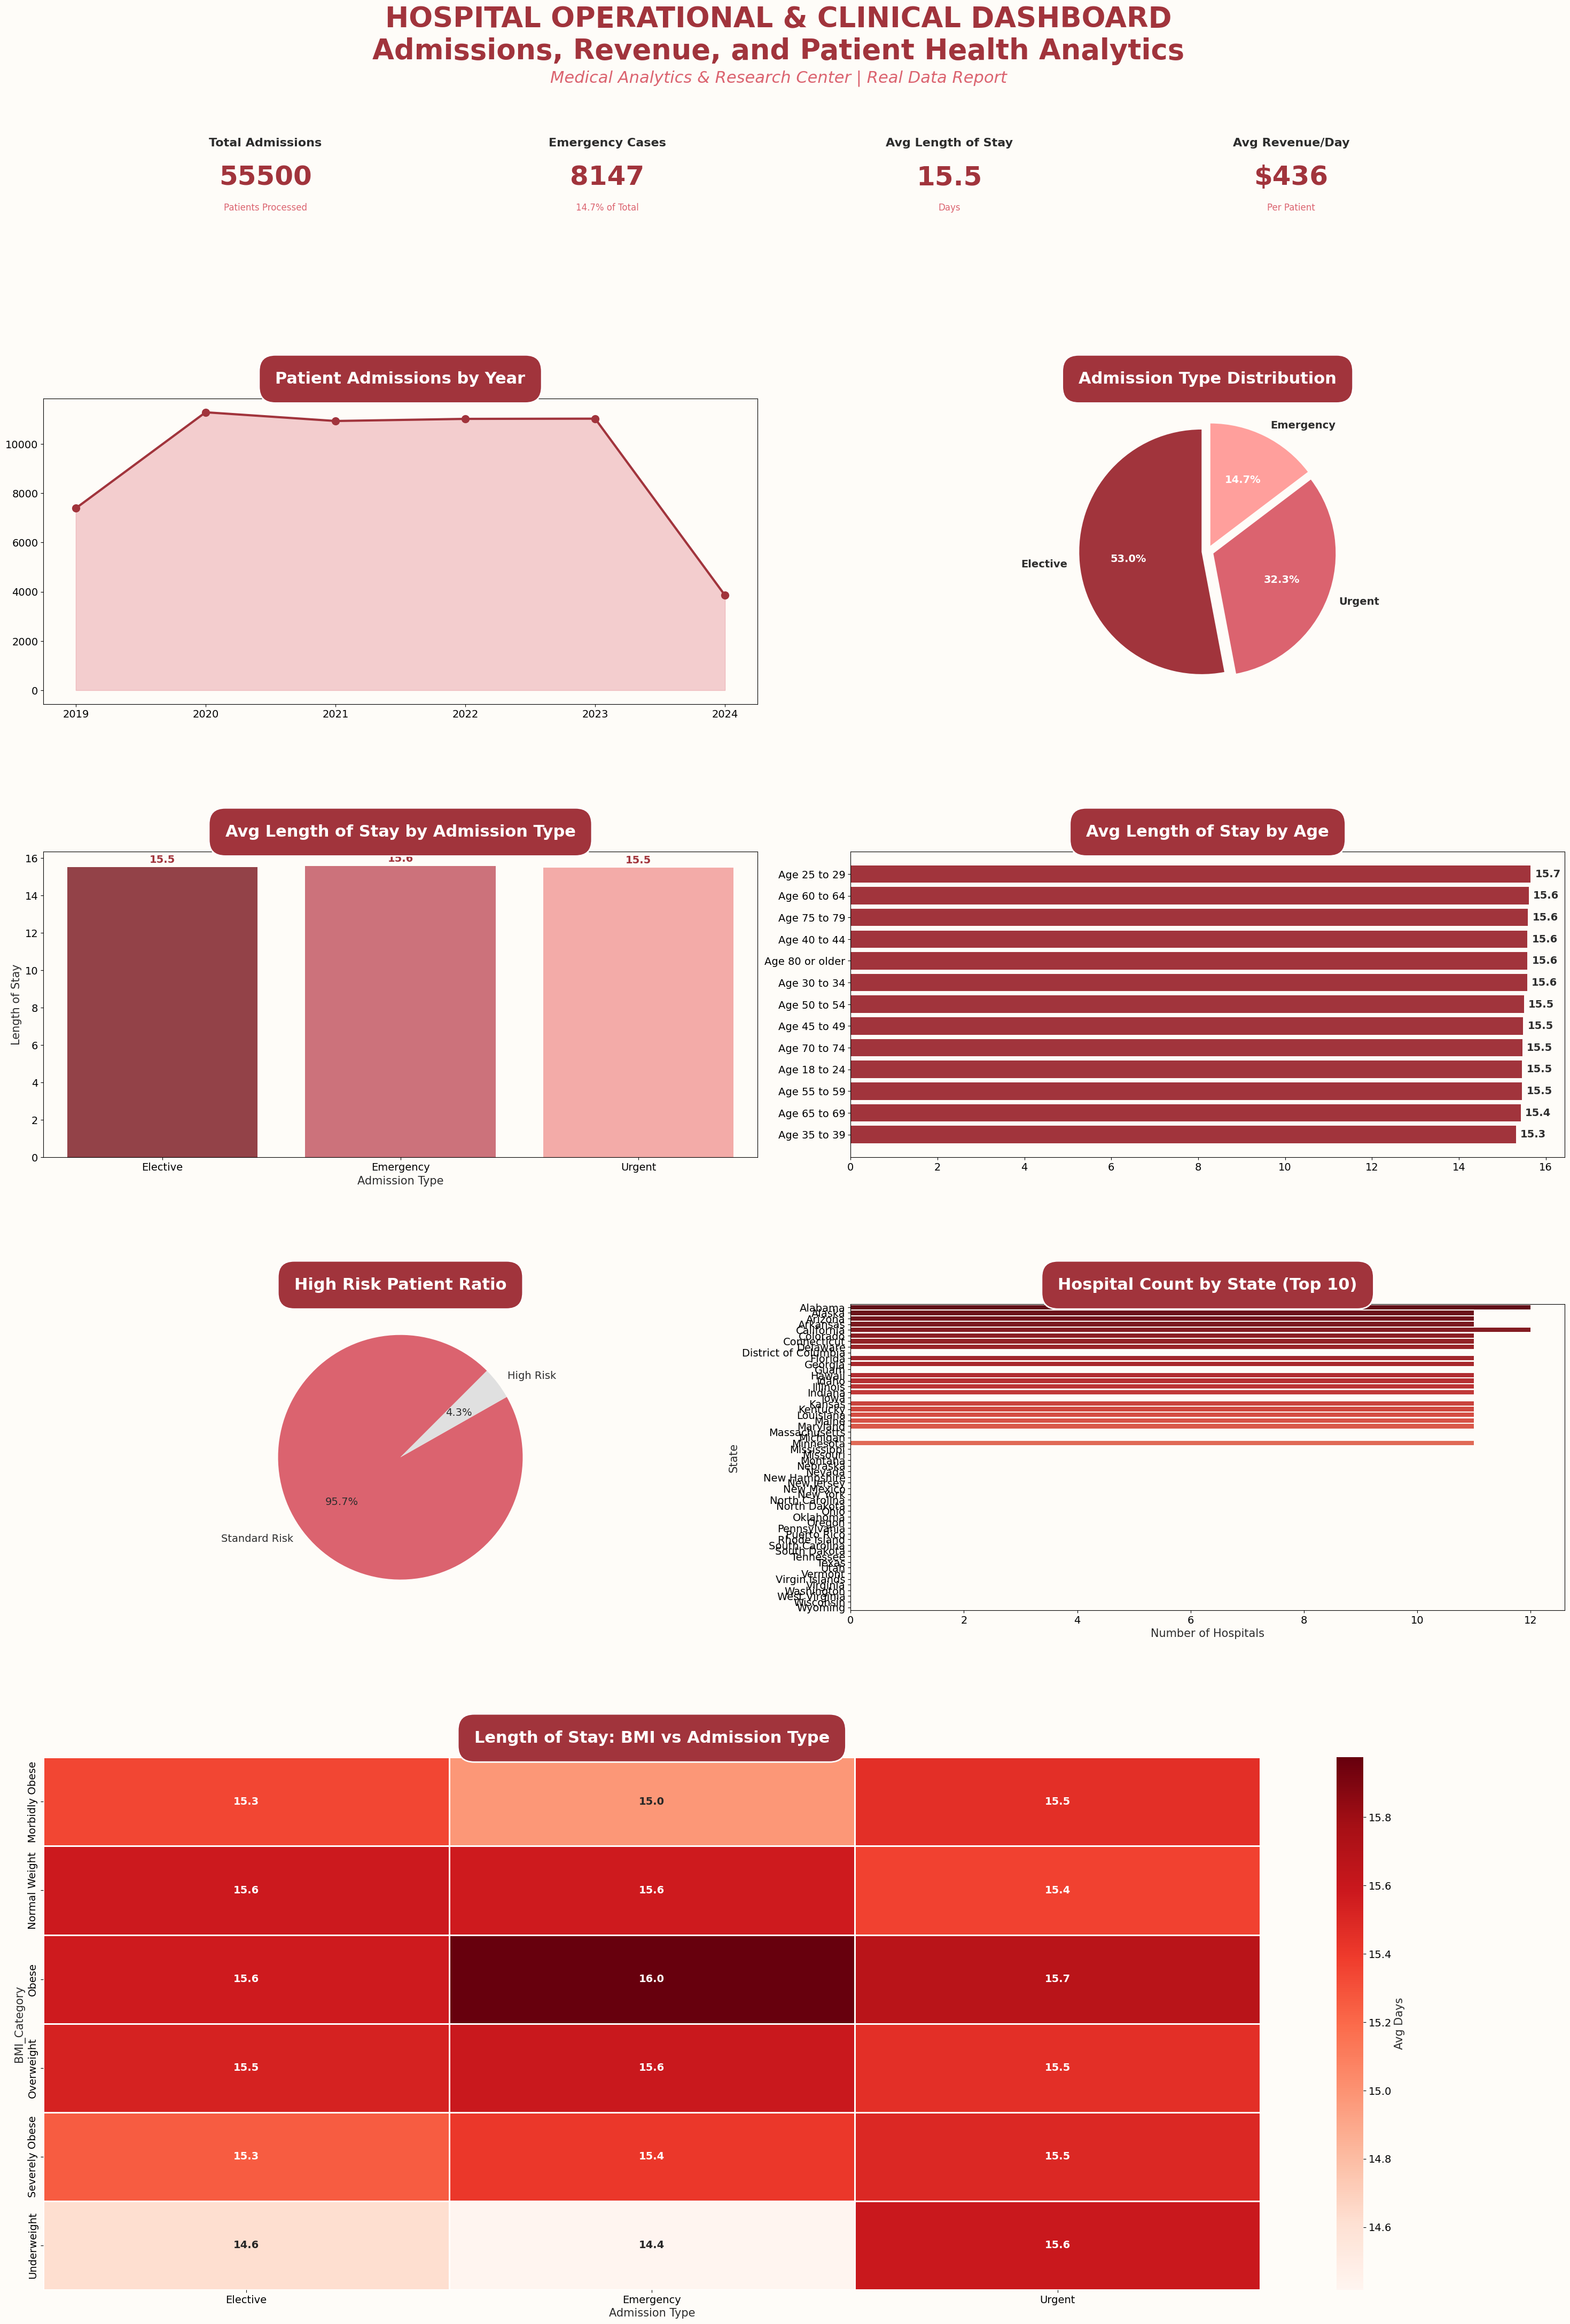

In [59]:
# ================== Theme Colors ======================
main   = "#a1343c"
accent = "#db636f"
light  = "#fefcf8"
dark   = "#2d2d2d"

plt.rcParams.update({
    'figure.figsize': (32, 48),
    'axes.facecolor': light,
    'figure.facecolor': light,
    'font.size': 14,
    'axes.labelsize': 15,
    'axes.titlesize': 19,
    'axes.titleweight': 'bold',
    'axes.labelcolor': dark,
})

# =====================================================
# Figure Layout
# =====================================================
fig = plt.figure(figsize=(32, 48), facecolor=light)

fig.suptitle(
    'HOSPITAL OPERATIONAL & CLINICAL DASHBOARD\n'
    'Admissions, Revenue, and Patient Health Analytics',
    fontsize=38, fontweight='bold', color=main, ha='center', y=0.985
)

fig.text(
    0.5, 0.955,
    'Medical Analytics & Research Center | Real Data Report',
    fontsize=22, color=accent, ha='center', style='italic'
)

# =====================================================
# Grid System
# =====================================================
gs = fig.add_gridspec(
    nrows=40,
    ncols=4,
    hspace=1.5,
    wspace=0.3,
    top=0.92,
    bottom=0.05,
    left=0.07,
    right=0.96
)

ax_q1 = fig.add_subplot(gs[4:10, 0:2])
ax_q6 = fig.add_subplot(gs[4:10, 2:4])
ax_q2 = fig.add_subplot(gs[12:18, 0:2])
ax_q3 = fig.add_subplot(gs[12:18, 2:4])
ax_q4 = fig.add_subplot(gs[20:26, 0:2])
ax_q10 = fig.add_subplot(gs[20:26, 2:4])
ax_q11 = fig.add_subplot(gs[28:38, 0:4])

# =====================================================
# Helper: Title Function
# =====================================================
def title(ax, text):
    ax.set_title(
        f"{text}",
        fontsize=22, fontweight='bold', color='white', backgroundcolor=main,
        pad=20,
        bbox=dict(facecolor=main, edgecolor='white', boxstyle='round,pad=1.0', linewidth=2)
    )

# =====================================================
# KPI CARDS
# =====================================================
kpi_total_adm = len(df)
kpi_emerg_adm = len(df[df['Admission Type'] == 'Emergency'])
kpi_avg_los = df['Length of Stay'].mean() if 'Length of Stay' in df.columns else 0
kpi_avg_rev = df['Cost per Patient Day'].mean()

def draw_kpi(fig, x, y, label, value, sublabel=""):
    fig.text(x, y, label, fontsize=16, color=dark, ha='center', fontweight='bold')
    fig.text(x, y-0.015, value, fontsize=36, color=main, ha='center', fontweight='bold')
    fig.text(x, y-0.025, sublabel, fontsize=12, color=accent, ha='center')

kpi_y = 0.93
draw_kpi(fig, 0.20, kpi_y, "Total Admissions", f"{kpi_total_adm}", "Patients Processed")
draw_kpi(fig, 0.40, kpi_y, "Emergency Cases", f"{kpi_emerg_adm}", f"{(kpi_emerg_adm/kpi_total_adm)*100:.1f}% of Total" if kpi_total_adm > 0 else "0%")
draw_kpi(fig, 0.60, kpi_y, "Avg Length of Stay", f"{kpi_avg_los:.1f}", "Days")
draw_kpi(fig, 0.80, kpi_y, "Avg Revenue/Day", f"${kpi_avg_rev:,.0f}", "Per Patient")

# =====================================================
# CHARTS IMPLEMENTATION
# =====================================================

# 1. Count of Patients by Year
yearly_counts = df['Year'].value_counts().sort_index()
ax_q1.plot(yearly_counts.index, yearly_counts.values, marker='o', color=main, linewidth=3, markersize=10)
ax_q1.fill_between(yearly_counts.index, yearly_counts.values, color=accent, alpha=0.3)
ax_q1.set_xticks(yearly_counts.index)
# Handle potential float years
ax_q1.set_xticklabels([int(x) if x == x else 0 for x in yearly_counts.index])
title(ax_q1, 'Patient Admissions by Year')

# 6. Emergency Admission Rate
adm_counts = df['Admission Type'].value_counts()
colors_pie = [main, accent, '#ff9f9c', '#ffe4e8']
wedges, texts, autotexts = ax_q6.pie(
    adm_counts.values, labels=adm_counts.index, autopct='%1.1f%%',
    colors=colors_pie[:len(adm_counts)], startangle=90, explode=[0.05]*len(adm_counts),
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)
for text in texts: text.set_color(dark)
for autotext in autotexts: autotext.set_color('white')
title(ax_q6, 'Admission Type Distribution')

# 2. Relation Between Length of Stay & Admission Type
if 'Length of Stay' in df.columns:
    sns.barplot(
        data=df, x='Admission Type', y='Length of Stay',
        palette=[main, accent, '#ff9f9c'], ax=ax_q2, errorbar=None
    )
    for p in ax_q2.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax_q2.annotate(f'{height:.1f}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points', fontweight='bold', color=main)
title(ax_q2, 'Avg Length of Stay by Admission Type')

# 3. Average Length of Stay by Age Category
if 'AgeCategory' in df.columns and 'Length of Stay' in df.columns:
    age_los = df.groupby('AgeCategory')['Length of Stay'].mean().sort_values()
    ax_q3.barh(age_los.index, age_los.values, color=main)
    for i, v in enumerate(age_los.values):
        ax_q3.text(v + 0.1, i, f"{v:.1f}", va='center', fontweight='bold', color=dark)
title(ax_q3, 'Avg Length of Stay by Age')

# 4. High Risk Patients
risk_counts = df['Risk_Label'].value_counts()
ax_q4.pie(
    risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%',
    colors=[accent, '#e0e0e0'], startangle=45,
    textprops={'fontsize': 14}
)
title(ax_q4, 'High Risk Patient Ratio')

# 10. Count of Hospital by State
if 'State' in df.columns and 'Hospital' in df.columns:
    state_hosp = df.groupby('State')['Hospital'].nunique().sort_values(ascending=False).head(20)
    sns.barplot(x=state_hosp.values, y=state_hosp.index, palette='Reds_r', ax=ax_q10)
    ax_q10.set_xlabel("Number of Hospitals")
title(ax_q10, 'Hospital Count by State (Top 10)')

# 11. Length of Stay by BMI Category and Admission Type
if 'BMI_Category' in df.columns and 'Admission Type' in df.columns and 'Length of Stay' in df.columns:
    heatmap_data = df.pivot_table(
        index='BMI_Category',
        columns='Admission Type',
        values='Length of Stay',
        aggfunc='mean'
    ).fillna(0)

    sns.heatmap(
        heatmap_data, annot=True, fmt=".1f",
        cmap="Reds", linewidths=1, linecolor='white',
        cbar_kws={'label': 'Avg Days'}, ax=ax_q11,
        annot_kws={"size": 14, "weight": "bold"}
    )
title(ax_q11, 'Length of Stay: BMI vs Admission Type')

# Final Save
plt.subplots_adjust(top=0.88, bottom=0.05, left=0.06, right=0.95)
print("Dashboard Generated Successfully (with auto-corrections).")
plt.show()

/tmp/ipython-input-2558887704.py:103: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_rev = df.groupby('Sex')['Billing Amount'].sum().sort_values(ascending=False)
/tmp/ipython-input-2558887704.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adm_avg = df.groupby('Admission Type')['Billing Amount'].mean().sort_values(ascending=False)
/tmp/ipython-input-2558887704.py:139: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_stack = df_clean.

Dashboard Generated Successfully with UNIFIED RED THEME.


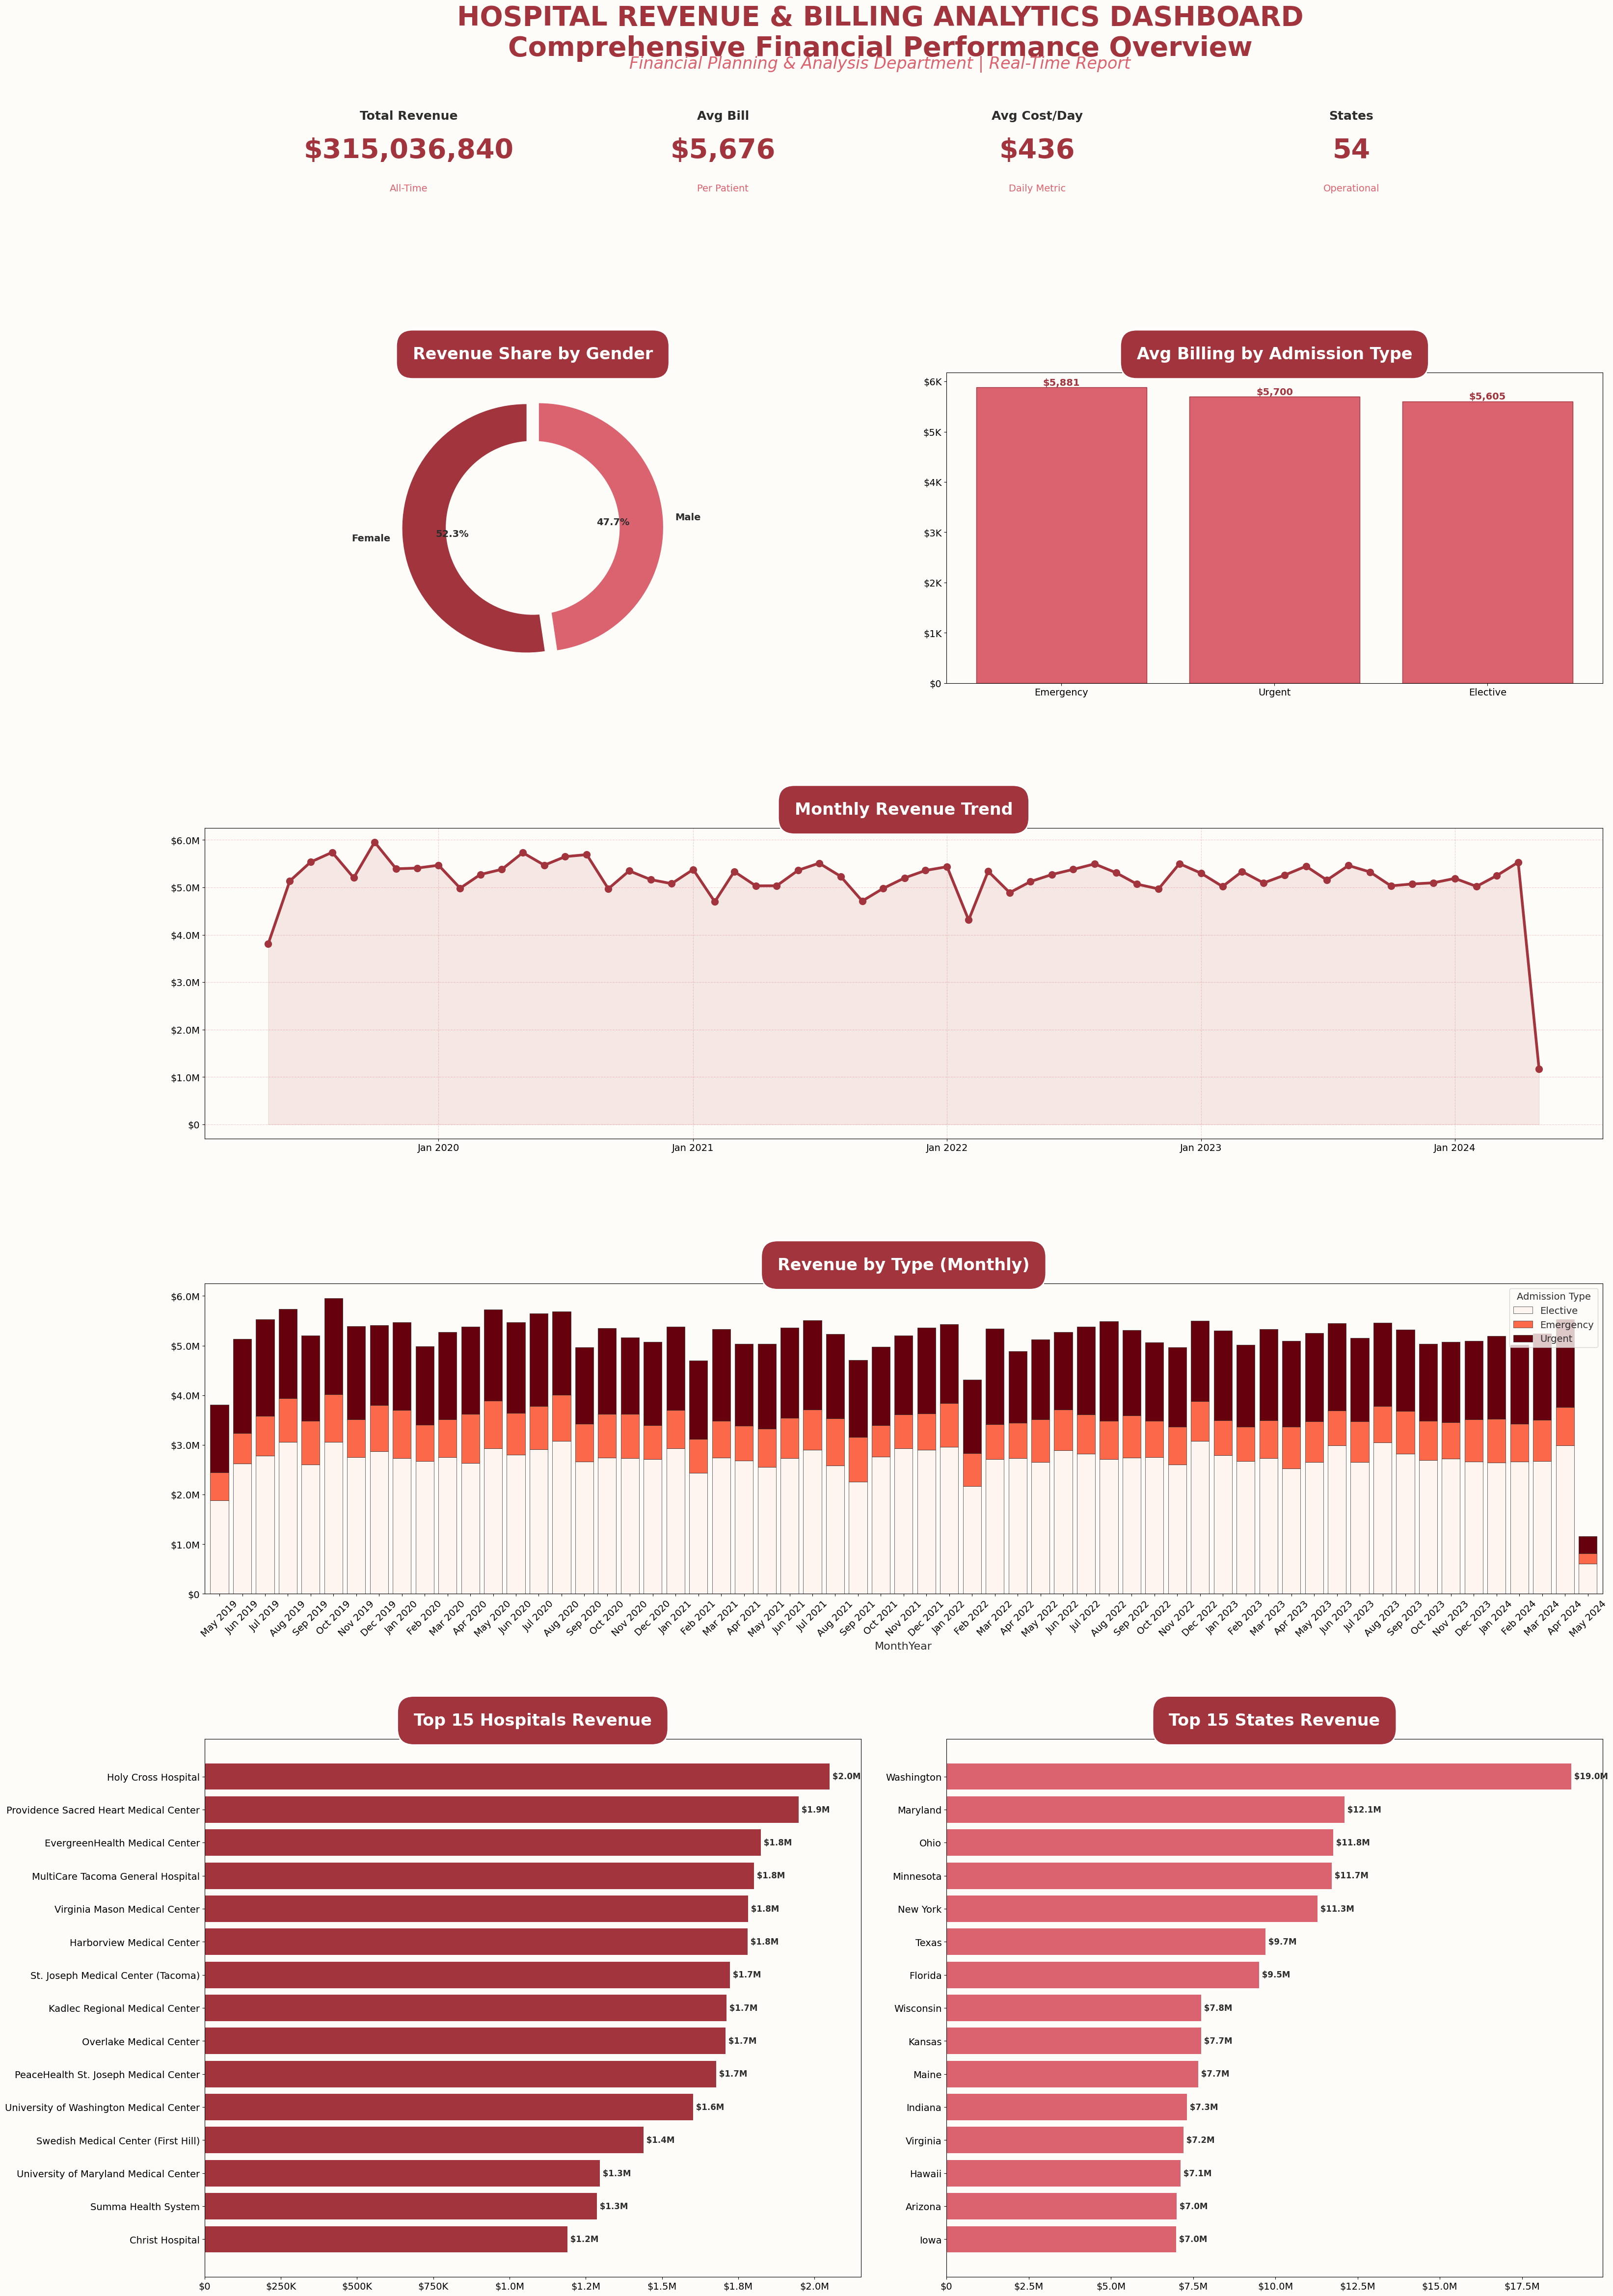

In [57]:
# CELL 5: Revenue & Billing Analytics Dashboard (FIXED)

# --- 1. Specific Data Prep for this Dashboard ---
# Ensure we don't have duplicate columns which cause the "Series" error
df = df.loc[:, ~df.columns.duplicated()]

if not df.empty:
    df.columns = [c.replace('\xa0', ' ').strip() for c in df.columns]
    df_clean = df.dropna(subset=['Date of Admission']).copy()
    if not df_clean.empty:
        df_clean['MonthYear'] = df_clean['Date of Admission'].dt.to_period('M')
    else:
        df_clean['MonthYear'] = None
else:
    df_clean = df.copy()

# --- 2. Theme Setup ---
main   = "#a1343c"
accent = "#db636f"
light  = "#fefcf8"
dark   = "#2d2d2d"

plt.rcParams.update({
    'figure.figsize': (32, 52),
    'axes.facecolor': light,
    'figure.facecolor': light,
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 20,
    'axes.titleweight': 'bold',
    'axes.labelcolor': dark,
})

# --- 3. Figure Layout ---
fig = plt.figure(figsize=(32, 52), facecolor=light)

fig.suptitle(
    'HOSPITAL REVENUE & BILLING ANALYTICS DASHBOARD\n'
    'Comprehensive Financial Performance Overview',
    fontsize=40, fontweight='bold', color=main, ha='center', y=0.985
)

fig.text(
    0.5, 0.960,
    'Financial Planning & Analysis Department | Real-Time Report',
    fontsize=24, color=accent, ha='center', style='italic'
)

# Grid System
gs = fig.add_gridspec(
    nrows=40, ncols=4, hspace=1.2, wspace=0.3,
    top=0.93, bottom=0.05, left=0.07, right=0.96
)

ax_gender = fig.add_subplot(gs[4:10, 0:2])
ax_adm_avg = fig.add_subplot(gs[4:10, 2:4])
ax_trend = fig.add_subplot(gs[12:18, 0:4])
ax_stack = fig.add_subplot(gs[20:26, 0:4])
ax_hosp = fig.add_subplot(gs[28:38, 0:2])
ax_state = fig.add_subplot(gs[28:38, 2:4])

# Helper Functions
def title(ax, text):
    ax.set_title(
        f"{text}",
        fontsize=24, fontweight='bold', color='white', backgroundcolor=main,
        pad=20,
        bbox=dict(facecolor=main, edgecolor='white', boxstyle='round,pad=1.0', linewidth=2)
    )

def format_currency(x, pos):
    if x >= 1e6: return f'${x*1e-6:.1f}M'
    elif x >= 1e3: return f'${x*1e-3:.0f}K'
    return f'${x:.0f}'

# --- 4. KPI CARDS (With Fix) ---
kpi_total_rev = df['Billing Amount'].sum()
kpi_avg_bill = df['Billing Amount'].mean()
kpi_states = df['State'].nunique()

# FIX: Calculate Cost per Day and ensure it is a scalar (single number)
cost_val = df['Cost per Patient Day'].mean()
if isinstance(cost_val, pd.Series):
    kpi_cost_day = cost_val.iloc[0] # Take the first value if duplicate columns exist
else:
    kpi_cost_day = cost_val

def draw_kpi(fig, x, y, label, value, sublabel):
    fig.text(x, y, label, fontsize=18, color=dark, ha='center', fontweight='bold')
    fig.text(x, y-0.015, value, fontsize=40, color=main, ha='center', fontweight='bold')
    fig.text(x, y-0.028, sublabel, fontsize=14, color=accent, ha='center')

kpi_y = 0.94
draw_kpi(fig, 0.20, kpi_y, "Total Revenue", f"${kpi_total_rev:,.0f}", "All-Time")
draw_kpi(fig, 0.40, kpi_y, "Avg Bill", f"${kpi_avg_bill:,.0f}", "Per Patient")
draw_kpi(fig, 0.60, kpi_y, "Avg Cost/Day", f"${kpi_cost_day:,.0f}", "Daily Metric")
draw_kpi(fig, 0.80, kpi_y, "States", f"{kpi_states}", "Operational")

# --- 5. CHARTS ---

# 1. Gender Revenue
if 'Sex' in df.columns:
    gender_rev = df.groupby('Sex')['Billing Amount'].sum().sort_values(ascending=False)
    colors_gender = [main, accent, '#ffc0cb', '#cccccc']
    ax_gender.pie(gender_rev.values, labels=gender_rev.index, autopct='%1.1f%%',
                  colors=colors_gender[:len(gender_rev)], startangle=90, explode=[0.05]*len(gender_rev),
                  textprops={'fontsize': 14, 'fontweight': 'bold'})
    ax_gender.add_artist(plt.Circle((0,0),0.70,fc=light))
title(ax_gender, 'Revenue Share by Gender')

# 2. Avg Billing by Type
if 'Admission Type' in df.columns:
    adm_avg = df.groupby('Admission Type')['Billing Amount'].mean().sort_values(ascending=False)
    bars = ax_adm_avg.bar(adm_avg.index, adm_avg.values, color=accent, edgecolor=main, linewidth=1)
    ax_adm_avg.yaxis.set_major_formatter(plt.FuncFormatter(format_currency))
    for bar in bars:
        height = bar.get_height()
        ax_adm_avg.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom', fontweight='bold', fontsize=14, color=main)
title(ax_adm_avg, 'Avg Billing by Admission Type')

# 3. Monthly Trend
if 'MonthYear' in df_clean.columns and not df_clean['MonthYear'].isna().all():
    monthly_trend = df_clean.groupby('MonthYear')['Billing Amount'].sum()
    monthly_trend.index = monthly_trend.index.to_timestamp()

    ax_trend.plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=4, color=main, markersize=10)
    ax_trend.fill_between(monthly_trend.index, monthly_trend.values, color=main, alpha=0.1)

    ax_trend.yaxis.set_major_formatter(plt.FuncFormatter(format_currency))
    ax_trend.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax_trend.grid(True, linestyle='--', alpha=0.3, color=accent)
    title(ax_trend, 'Monthly Revenue Trend')
else:
    ax_trend.text(0.5, 0.5, 'No Valid Date Data Found', ha='center', fontsize=20, color='red')

# 4. Stacked Analysis
if 'MonthYear' in df_clean.columns and 'Admission Type' in df_clean.columns and not df_clean['MonthYear'].isna().all():
    pivot_stack = df_clean.pivot_table(index='MonthYear', columns='Admission Type', values='Billing Amount', aggfunc='sum').fillna(0)
    pivot_stack.index = pivot_stack.index.to_timestamp()

    pivot_stack.plot(kind='bar', stacked=True, ax=ax_stack, colormap='Reds', width=0.8, edgecolor=dark, linewidth=0.5)

    ax_stack.yaxis.set_major_formatter(plt.FuncFormatter(format_currency))
    labels = [item.strftime('%b %Y') for item in pivot_stack.index]
    ax_stack.set_xticklabels(labels, rotation=45)
    ax_stack.legend(title='Admission Type')
    title(ax_stack, 'Revenue by Type (Monthly)')
else:
    ax_stack.text(0.5, 0.5, 'No Valid Date Data Found', ha='center', fontsize=20, color='red')

# 5. Top Hospitals
if 'Hospital' in df.columns:
    top_hospitals = df.groupby('Hospital')['Billing Amount'].sum().nlargest(15).sort_values(ascending=True)
    ax_hosp.barh(top_hospitals.index, top_hospitals.values, color=main)
    ax_hosp.xaxis.set_major_formatter(plt.FuncFormatter(format_currency))
    for i, v in enumerate(top_hospitals.values):
        ax_hosp.text(v, i, f' ${v*1e-6:.1f}M', va='center', fontweight='bold', color=dark, fontsize=12)
title(ax_hosp, 'Top 15 Hospitals Revenue')

# 6. Top States
if 'State' in df.columns:
    top_states = df.groupby('State')['Billing Amount'].sum().nlargest(15).sort_values(ascending=True)
    ax_state.barh(top_states.index, top_states.values, color=accent)
    ax_state.xaxis.set_major_formatter(plt.FuncFormatter(format_currency))
    for i, v in enumerate(top_states.values):
        ax_state.text(v, i, f' ${v*1e-6:.1f}M', va='center', fontweight='bold', color=dark, fontsize=12)
title(ax_state, 'Top 15 States Revenue')

plt.subplots_adjust(top=0.90, bottom=0.05, left=0.08, right=0.95)
print("Dashboard Generated Successfully with UNIFIED RED THEME.")
plt.show()

/tmp/ipython-input-1366885226.py:165: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  walk = df.groupby('AgeCategory')['DifficultyWalking'].mean().sort_index()
/tmp/ipython-input-1366885226.py:168: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(walk.index, rotation=10, ha='right')
/tmp/ipython-input-1366885226.py:193: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_health = df.groupby('GeneralHealth')['BMI'].mean().reindex(present_health)
/tmp/ipython-input-1366885226.py:203: FutureWarning: The default of obs

✅ Dashboard Generated Successfully with INCREASED spacing.


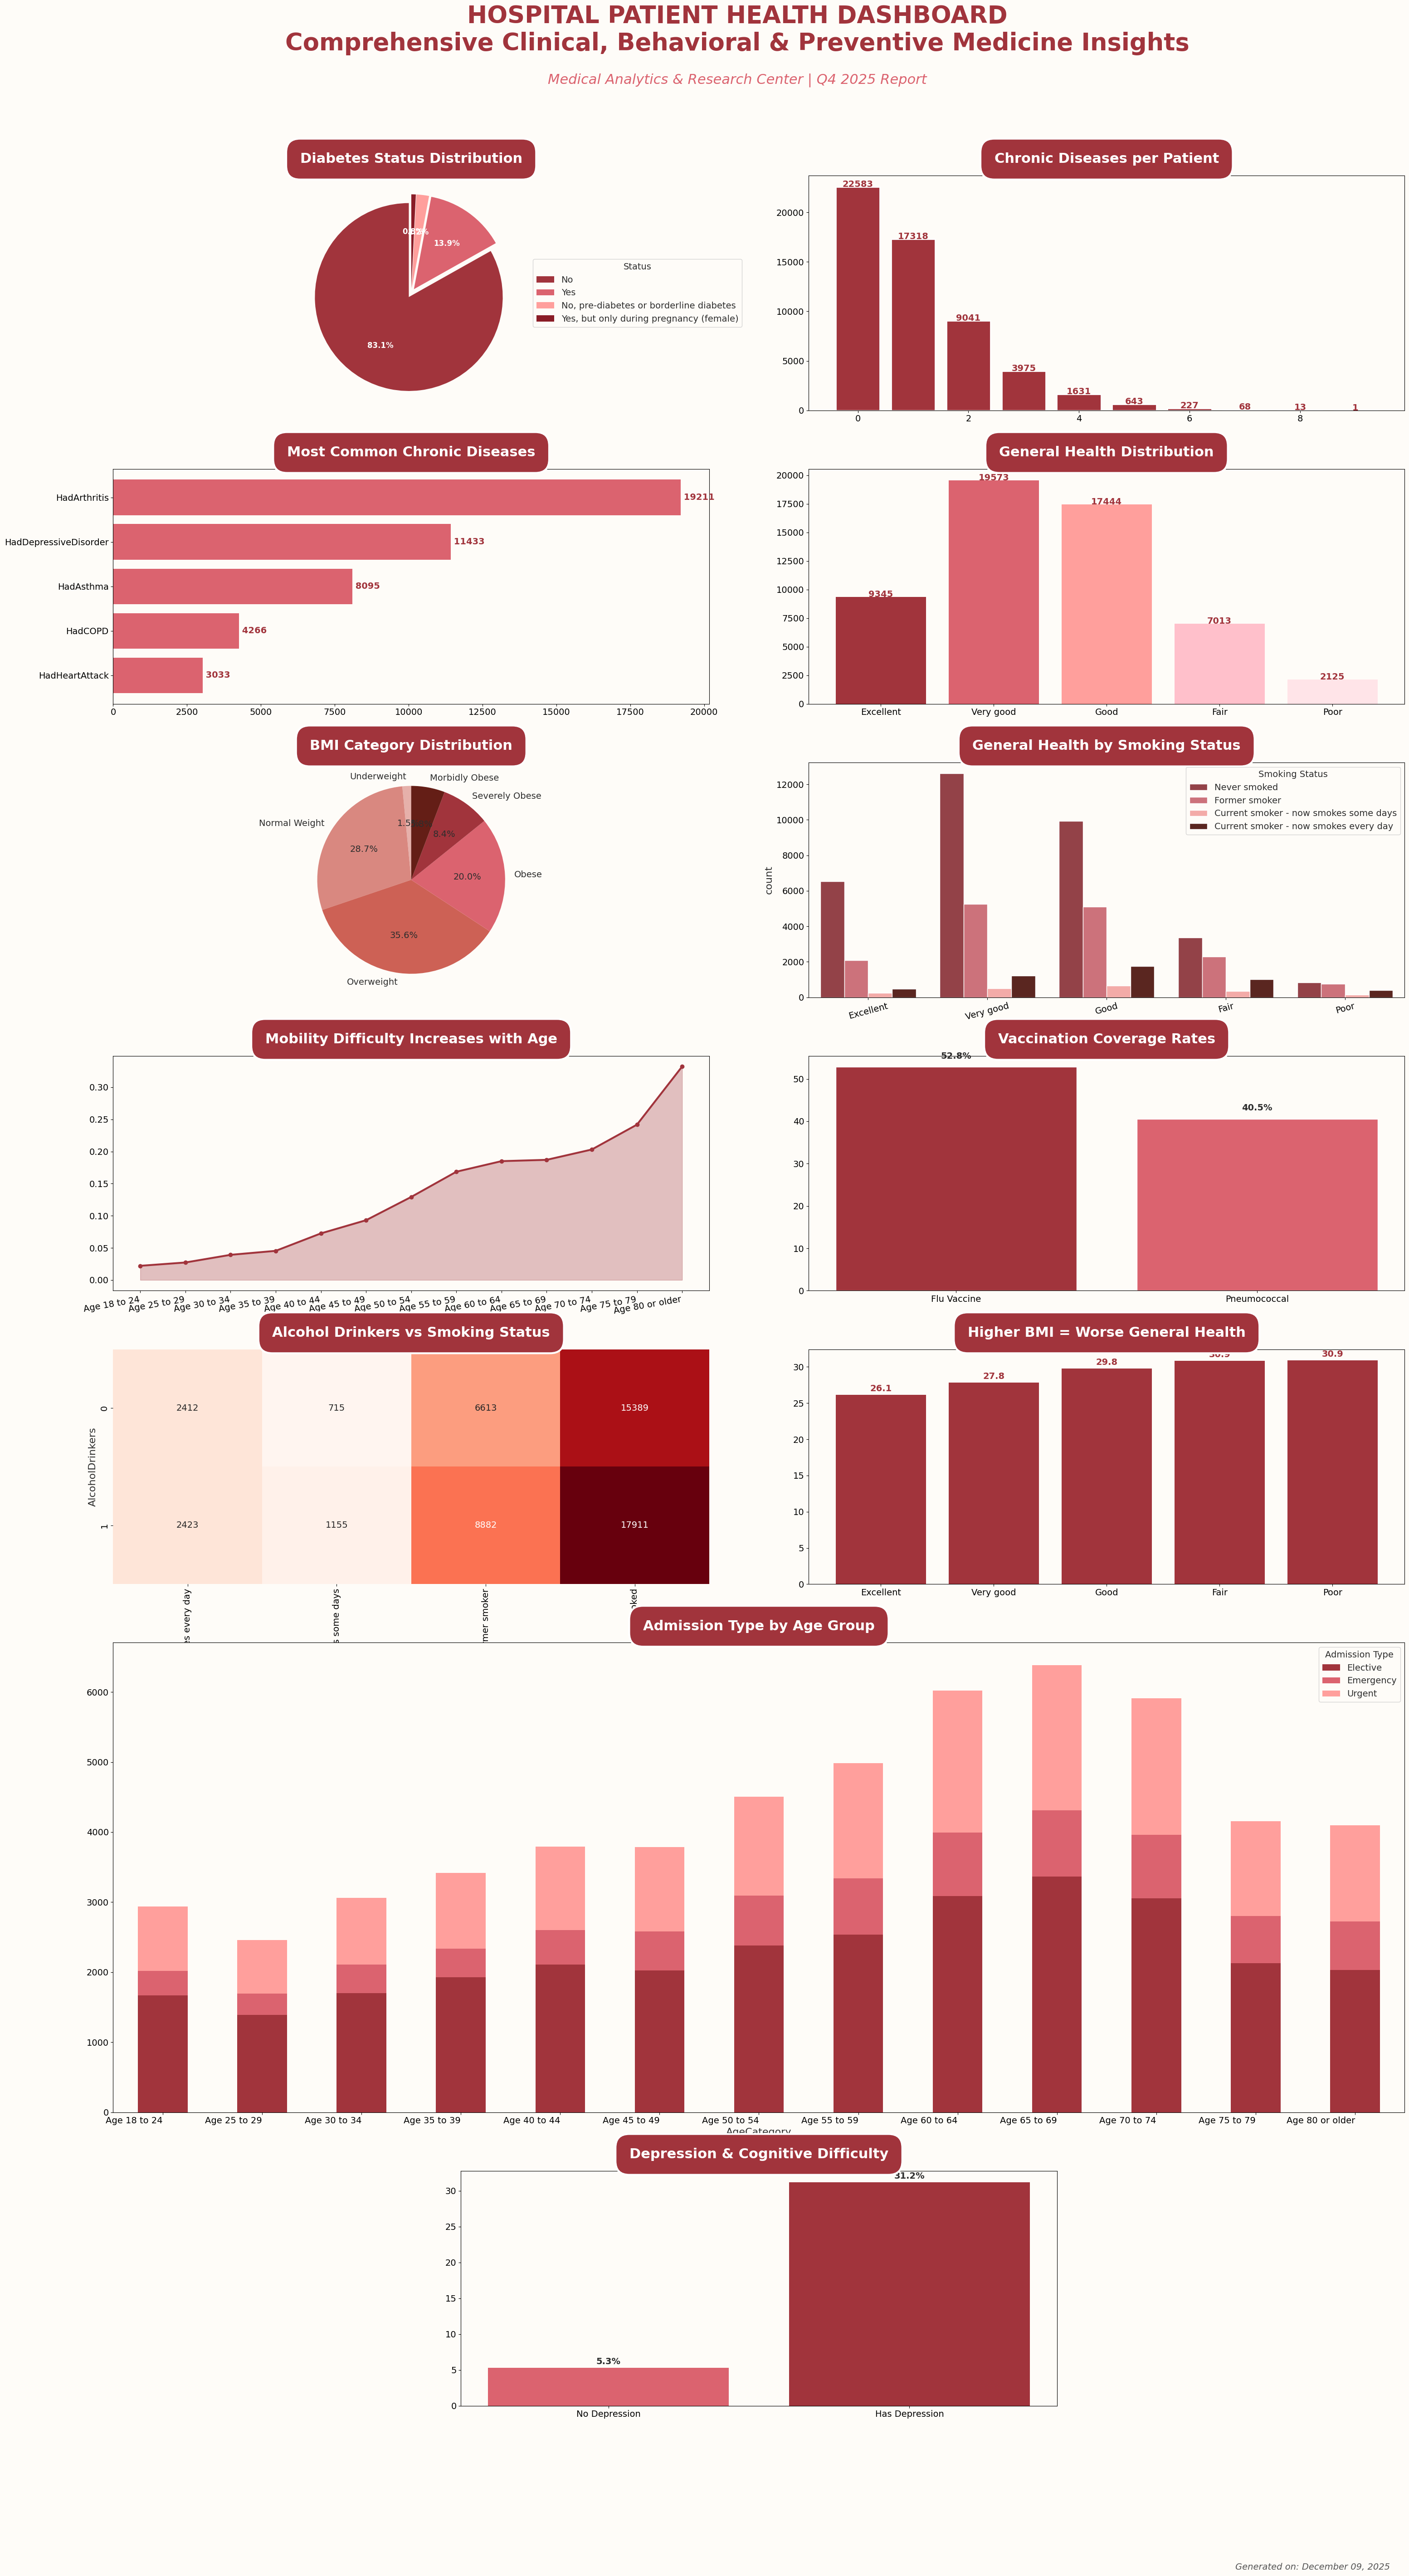

In [58]:

# ================== Theme Colors (Red/Burgundy) ======================
main   = "#a1343c"
accent = "#db636f"
light  = "#fefcf8"
dark   = "#2d2d2d"

plt.rcParams.update({
    # --- التعديل الأول: زيادة الارتفاع الكلي للصورة ---
    'figure.figsize': (32, 58),  # قمت بزيادة الارتفاع من 48 إلى 58
    'axes.facecolor': light,
    'figure.facecolor': light,
    'font.size': 14,
    'axes.labelsize': 16,
    'axes.titlesize': 20,
    'axes.titleweight': 'bold',
    'axes.labelcolor': dark,
    'text.color': dark
})

# =====================================================
# Figure Layout
# =====================================================
fig = plt.figure(facecolor=light) # الحجم مأخوذ من rcParams

fig.suptitle(
    'HOSPITAL PATIENT HEALTH DASHBOARD\n'
    'Comprehensive Clinical, Behavioral & Preventive Medicine Insights',
    fontsize=38, fontweight='bold', color=main, ha='center', y=0.985
)

fig.text(
    0.5, 0.955,
    'Medical Analytics & Research Center | Q4 2025 Report',
    fontsize=22, color=accent, ha='center', style='italic'
)

fig.text(
    0.95, 0.01,
    f'Generated on: {pd.Timestamp.now().strftime("%B %d, %Y")}',
    fontsize=14, color='#555555', ha='right', style='italic'
)

# =====================================================
# Grid with INCREASED spacing
# =====================================================
gs = fig.add_gridspec(
    nrows=40, ncols=4,
    # --- التعديل الثاني: زيادة التباعد الرأسي ---
    hspace=500.0,     # تم تغييرها من 1.5 إلى 3.0 (زيادة كبيرة)
    wspace=0.4,
    top=0.92, bottom=0.05, left=0.07, right=0.96
)

axes = [
    fig.add_subplot(gs[0:5, 0:2]),
    fig.add_subplot(gs[0:5, 2:4]),
    fig.add_subplot(gs[5:10, 0:2]),
    fig.add_subplot(gs[5:10, 2:4]),
    fig.add_subplot(gs[10:15, 0:2]),
    fig.add_subplot(gs[10:15, 2:4]),
    fig.add_subplot(gs[15:20, 0:2]),
    fig.add_subplot(gs[15:20, 2:4]),
    fig.add_subplot(gs[20:25, 0:2]),
    fig.add_subplot(gs[20:25, 2:4]),
    fig.add_subplot(gs[25:34, 0:4]),
    fig.add_subplot(gs[34:39, 1:3]),
]

# =====================================================
# Title Function
# =====================================================
def title(ax, text):
    ax.set_title(
        f"{text}",
        fontsize=22, fontweight='bold', color='white', backgroundcolor=main,
        pad=20,
        bbox=dict(facecolor=main, edgecolor='white', boxstyle='round,pad=1.0', linewidth=3)
    )

# =====================================================
# START PLOTS
# =====================================================

# 1. Diabetes Status
ax = axes[0]
if 'HadDiabetes' in df.columns:
    diab_counts = df['HadDiabetes'].value_counts()
    colors_diab = [main, accent, '#ff9f9c', '#8a1c26']

    wedges, texts, autotexts = ax.pie(diab_counts.values, labels=None, autopct='%1.1f%%',
           colors=colors_diab[:len(diab_counts)], startangle=90, explode=[0.05]*len(diab_counts),
           textprops={'fontsize':12, 'fontweight':'bold', 'color':'white'})

    ax.legend(wedges, diab_counts.index,
              title="Status",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    title(ax, 'Diabetes Status Distribution')

# 2. Chronic Diseases per Patient
ax = axes[1]
chronic_cols = ['HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer',
                'HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes']
avail_chronic = [c for c in chronic_cols if c in df.columns]
if avail_chronic:
    temp_df = df[avail_chronic].apply(pd.to_numeric, errors='coerce').fillna(0)
    df['Chronic_Count'] = temp_df.sum(axis=1)
    counts = df['Chronic_Count'].value_counts().sort_index()
    ax.bar(counts.index, counts.values, color=main, edgecolor='white', linewidth=2)
    for i, v in enumerate(counts.values):
        ax.text(counts.index[i], v + 0.5, str(int(v)), ha='center', fontweight='bold', color=main)
    title(ax, 'Chronic Diseases per Patient')

# 3. Top Chronic Diseases
ax = axes[2]
diseases = ['HadArthritis','HadDepressiveDisorder','HadAsthma','HadCOPD','HadHeartAttack']
avail_dis = [d for d in diseases if d in df.columns]
if avail_dis:
    disease_sum = df[avail_dis].apply(pd.to_numeric, errors='coerce').sum().sort_values(ascending=True)
    ax.barh(disease_sum.index, disease_sum.values, color=accent)
    for i, v in enumerate(disease_sum.values):
        ax.text(v, i, f' {int(v)}', va='center', fontweight='bold', color=main)
    title(ax, 'Most Common Chronic Diseases')

# 4. General Health Status
ax = axes[3]
if 'GeneralHealth' in df.columns:
    health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
    present_health = [h for h in health_order if h in df['GeneralHealth'].unique()]
    health_counts = df['GeneralHealth'].value_counts().reindex(present_health)
    ax.bar(health_counts.index, health_counts.values,
           color=[main, accent, '#ff9f9c', '#ffc0cb', '#ffe4e8'][:len(health_counts)])
    for i, v in enumerate(health_counts.values):
        if pd.notna(v):
            ax.text(i, v + 0.5, str(int(v)), ha='center', fontweight='bold', color=main)
    title(ax, 'General Health Distribution')

# 5. BMI Distribution
ax = axes[4]
if 'BMI_Category' in df.columns:
    bmi_order = ['Underweight', 'Normal Weight', 'Overweight', 'Obese', 'Severely Obese', 'Morbidly Obese']
    present_bmi = [b for b in bmi_order if b in df['BMI_Category'].unique()]
    bmi_counts = df['BMI_Category'].value_counts().reindex(present_bmi)
    colors_bmi = ['#e6b0aa', '#d98880', '#cd6155', accent, main, '#641e16']
    ax.pie(bmi_counts.values, labels=bmi_counts.index, autopct='%1.1f%%',
           colors=colors_bmi[:len(bmi_counts)], startangle=90)
    title(ax, 'BMI Category Distribution')

# 6. Smoking vs General Health
ax = axes[5]
if 'GeneralHealth' in df.columns and 'SmokerStatus' in df.columns:
    smoker_order = ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days', 'Current smoker - now smokes every day']
    smoker_colors = [main, accent, '#ff9f9c', '#641e16']
    sns.countplot(data=df, x='GeneralHealth', hue='SmokerStatus',
                  order=present_health, hue_order=smoker_order,
                  palette=smoker_colors, ax=ax, edgecolor='white')
    ax.tick_params(axis='x', rotation=15)
    ax.legend(title='Smoking Status', bbox_to_anchor=(1,1))
    title(ax, 'General Health by Smoking Status')

# 7. Difficulty Walking by Age
ax = axes[6]
if 'AgeCategory' in df.columns and 'DifficultyWalking' in df.columns:
    walk = df.groupby('AgeCategory')['DifficultyWalking'].mean().sort_index()
    ax.plot(walk.index, walk.values, marker='o', color=main, linewidth=3)
    ax.fill_between(walk.index, walk.values, alpha=0.3, color=main)
    ax.set_xticklabels(walk.index, rotation=10, ha='right')
    title(ax, 'Mobility Difficulty Increases with Age')

# 8. Vaccination Coverage
ax = axes[7]
vax_cols = ['FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap_Clean' if 'TetanusLast10Tdap_Clean' in df.columns else 'TetanusLast10Tdap']
avail_vax = [v for v in vax_cols if v in df.columns]
if avail_vax:
    vax_names = ['Flu Vaccine', 'Pneumococcal', 'Tetanus (10y)']
    vax_rate = df[avail_vax].apply(pd.to_numeric, errors='coerce').mean()
    ax.bar(vax_names[:len(vax_rate)], vax_rate.values * 100, color=[main, accent, main], edgecolor='white')
    for i, v in enumerate(vax_rate.values):
        ax.text(i, v*100 + 2, f'{v*100:.1f}%', ha='center', fontweight='bold')
    title(ax, 'Vaccination Coverage Rates')

# 9. Alcohol vs Smoking
ax = axes[8]
if 'AlcoholDrinkers' in df.columns and 'SmokerStatus' in df.columns:
    cross = pd.crosstab(df['AlcoholDrinkers'], df['SmokerStatus'])
    sns.heatmap(cross, annot=True, fmt='d', cmap='Reds', ax=ax, cbar=False)
    title(ax, 'Alcohol Drinkers vs Smoking Status')

# 10. BMI vs General Health
ax = axes[9]
if 'GeneralHealth' in df.columns and 'BMI' in df.columns:
    bmi_health = df.groupby('GeneralHealth')['BMI'].mean().reindex(present_health)
    ax.bar(bmi_health.index, bmi_health.values, color=main)
    for i, v in enumerate(bmi_health.values):
        if pd.notna(v):
            ax.text(i, v + 0.5, f'{v:.1f}', ha='center', fontweight='bold', color=main)
    title(ax, 'Higher BMI = Worse General Health')

# 11. Admission Type by Age
ax = axes[10]
if 'AgeCategory' in df.columns and 'Admission Type' in df.columns:
    adm_age = df.groupby(['AgeCategory', 'Admission Type']).size().unstack()
    if not adm_age.empty:
        adm_age.plot(kind='bar', stacked=True, ax=ax, color=[main, accent, '#ff9f9c'])
        ax.set_xticklabels(adm_age.index, rotation=0, ha='right')
        ax.legend(title='Admission Type')
        title(ax, 'Admission Type by Age Group')

# 12. Depression vs Concentration
ax = axes[11]
if 'HadDepressiveDisorder' in df.columns and 'DifficultyConcentrating' in df.columns:
    df['DifficultyConcentrating'] = pd.to_numeric(df['DifficultyConcentrating'], errors='coerce')
    dep_conc = df.groupby('HadDepressiveDisorder')['DifficultyConcentrating'].mean()
    labels = dep_conc.index.tolist()
    labels = ['Has Depression' if str(x) in ['1', 'Yes'] else 'No Depression' for x in labels]
    ax.bar(labels, dep_conc.values * 100, color=[accent, main])
    for i, v in enumerate(dep_conc.values):
        ax.text(i, v*100 + 0.5, f'{v*100:.1f}%', ha='center', fontweight='bold')
    title(ax, 'Depression & Cognitive Difficulty')

# Final Save
plt.subplots_adjust(top=0.90, bottom=0.05, left=0.06, right=0.95)
print("✅ Dashboard Generated Successfully with INCREASED spacing.")
plt.show()